In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
deliv = pd.read_csv('deliveries.csv')
deliv.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
deliv.shape

(179078, 21)

In [5]:
match = pd.read_csv('matches.csv')
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [6]:
match.shape

(756, 18)

## ---------------------------------------------------------------------------------------------------

In [7]:
match['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [8]:
match['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

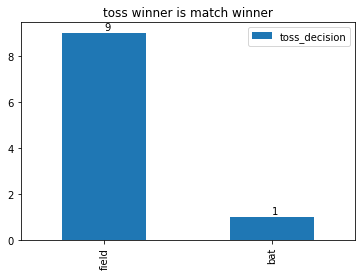

In [9]:
df = pd.DataFrame(match[(match['dl_applied'] == 1) &
      (match['toss_winner'] == match['winner'])]['toss_decision'].value_counts())
df.plot(kind = 'bar')
ind = df.index
for i in range(len(ind)):
    plt.text(x = i, y = df.iloc[i, 0] + 0.1, s = df.iloc[i, 0])
    
plt.title('toss winner is match winner')
plt.show()

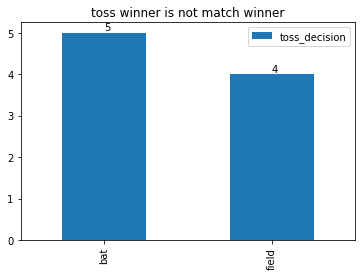

In [10]:
df = pd.DataFrame(match[(match['dl_applied'] == 1) &
      (match['toss_winner'] != match['winner'])]['toss_decision'].value_counts())
df.plot(kind = 'bar')
ind = df.index
for i in range(len(ind)):
    plt.text(x = i, y = df.iloc[i, 0] + 0.05, s = df.iloc[i, 0])
    
plt.title('toss winner is not match winner')
plt.show()

In [11]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
match.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'}, inplace = True)

In [13]:
match['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiant          15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [14]:
match['team2'].value_counts()

Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiant         15
Delhi Capitals                 10
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

In [15]:
mat_cnt = match['team1'].value_counts() + match['team2'].value_counts()
mat_cnt

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          30
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [16]:
mat_cnt = mat_cnt.sort_values(ascending = False)

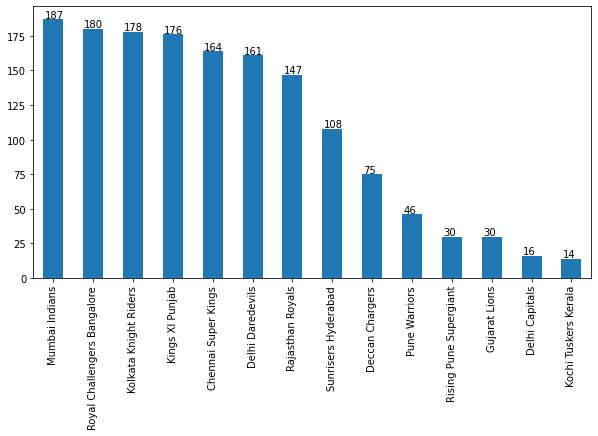

In [17]:
plt.figure(figsize = (10,5))
mat_cnt.plot(kind = 'bar')
team = mat_cnt.index
for i in range(len(team)):
    plt.text(x = i-0.22, y = mat_cnt[team[i]] + 1, s = mat_cnt[team[i]])
plt.show()

In [18]:
mat_cnt = pd.DataFrame(mat_cnt, columns = ['match_count'])
mat_cnt.head(2)

,match_count
Mumbai Indians,187
Royal Challengers Bangalore,180


In [19]:
sesn_cnt = pd.DataFrame(index = mat_cnt.index, columns = ['season_count'])

for i in mat_cnt.index:
    sesn_cnt.loc[i, 'season_count'] = match[(match['team1'] == i) | (match['team2'] == i)]['season'].nunique()
    
sesn_cnt.head(2)

,season_count
Mumbai Indians,12
Royal Challengers Bangalore,12


In [20]:
team = pd.concat([sesn_cnt, mat_cnt], axis = 1)
team.head(2)

,season_count,match_count
Mumbai Indians,12,187
Royal Challengers Bangalore,12,180


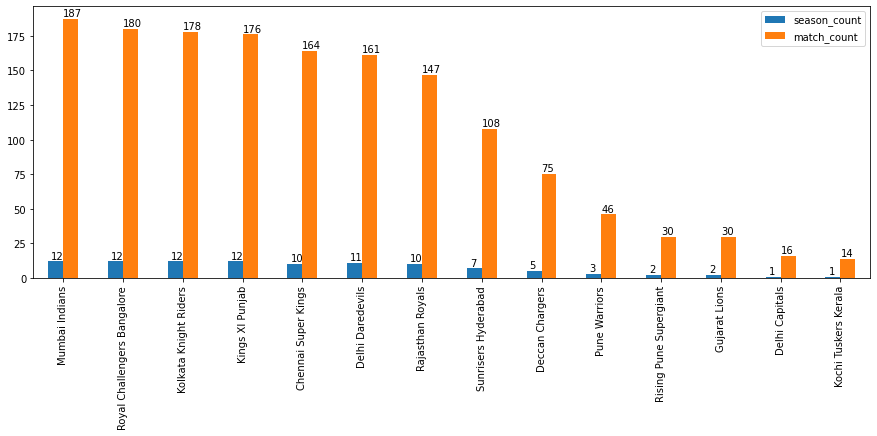

In [21]:
tm = team.index
team.plot(kind = 'bar', figsize = (15,5))
for i in range(len(tm)):
    plt.text(x = i-0.2, y = team.loc[tm[i], 'season_count']+2, s = team.loc[tm[i], 'season_count'])
for i in range(len(tm)):
    plt.text(x = i, y = team.loc[tm[i], 'match_count']+2, s = team.loc[tm[i], 'match_count'])
plt.show()

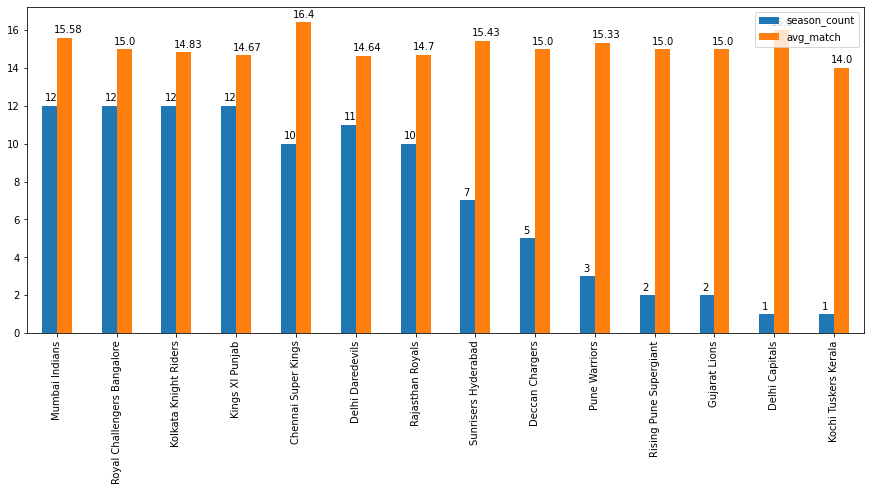

In [22]:
tm = team.index
df = team[['season_count']]
df['avg_match'] = (team['match_count'])/(team['season_count'])
df.plot(kind = 'bar', figsize = (15,6))
for i in range(len(tm)):
    plt.text(x = i-0.2, y = team.loc[tm[i], 'season_count']+0.25, s = team.loc[tm[i], 'season_count'])
for i in range(len(tm)):
    plt.text(x = i-0.05, y = df.loc[tm[i], 'avg_match'] + 0.25,
             s = round(df.loc[tm[i], 'avg_match'], 2))
plt.show()

## ---------------------------------------------------------------------------------------------------

In [23]:
win = pd.DataFrame(match['winner'].value_counts())
win.columns = ['wins']
win.head(2)

,wins
Mumbai Indians,109
Chennai Super Kings,100


In [24]:
team = pd.concat([team, win], axis = 1)
team.head(2)

,season_count,match_count,wins
Mumbai Indians,12,187,109
Royal Challengers Bangalore,12,180,84


In [25]:
team['loss'] = team['match_count'] - team['wins']
team.head(2)

,season_count,match_count,wins,loss
Mumbai Indians,12,187,109,78
Royal Challengers Bangalore,12,180,84,96


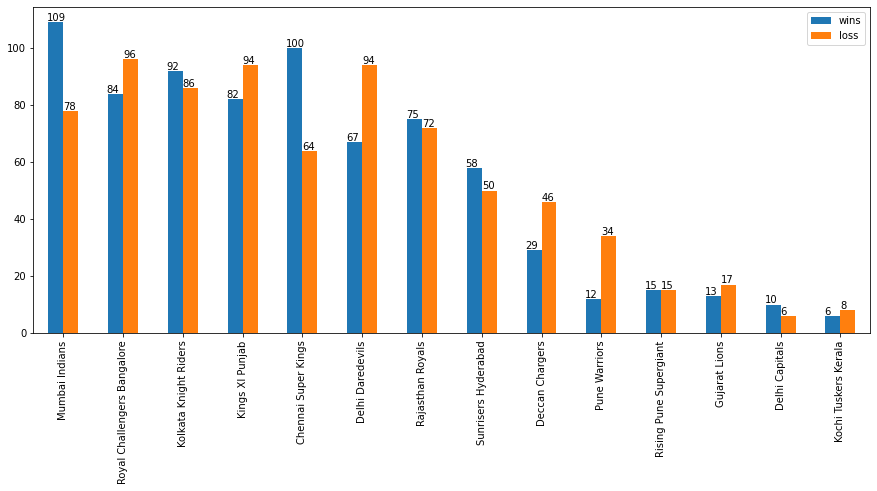

In [26]:
df = team[['wins', 'loss']]
tm = df.index
df.plot(kind = 'bar', figsize = (15,6))
for i in range(len(tm)):
    plt.text(x = i-0.27, y = df.loc[tm[i], 'wins']+0.5, s = df.loc[tm[i], 'wins'])
    plt.text(x = i, y = df.loc[tm[i], 'loss']+0.5, s = df.loc[tm[i], 'loss'])
plt.show()

In [27]:
team['win_percentage'] = (team['wins']/team['match_count'])*100
team['loss_percentage'] = (team['loss']/team['match_count'])*100
team.head(2)

,season_count,match_count,wins,loss,win_percentage,loss_percentage
Mumbai Indians,12,187,109,78,58.288770,41.711230
Royal Challengers Bangalore,12,180,84,96,46.666667,53.333333


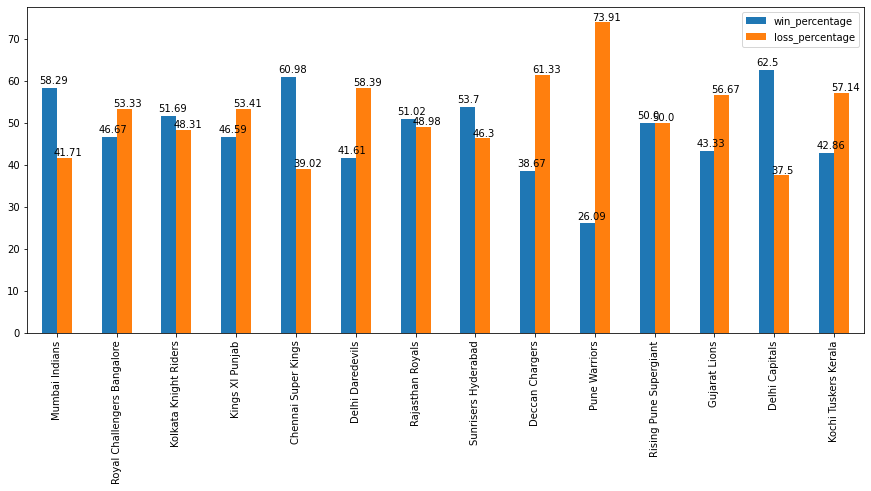

In [28]:
df = team[['win_percentage', 'loss_percentage']]
tm = df.index
df.plot(kind = 'bar', figsize = (15,6))
for i in range(len(tm)):
    plt.text(x = i-0.3, y = df.loc[tm[i], 'win_percentage']+1,
             s = round(df.loc[tm[i], 'win_percentage'], 2))
    plt.text(x = i-0.05, y = df.loc[tm[i], 'loss_percentage']+0.5,
             s = round(df.loc[tm[i], 'loss_percentage'], 2))
plt.show()

## ---------------------------------------------------------------------------------------------------

In [29]:
toss = pd.DataFrame(index = mat_cnt.index, columns = ['toss_winner', 'toss_win', 'toss_loss'])
for i in mat_cnt.index:
    toss.loc[i, 'toss_winner'] = match[match['toss_winner'] == i].shape[0]
    toss.loc[i, 'toss_win'] = match[(match['toss_winner'] == i) & (match['winner'] == i)].shape[0]
    toss.loc[i, 'toss_loss'] = match[(match['toss_winner'] == i) & (match['winner'] != i)].shape[0]
toss.head(2)

,toss_winner,toss_win,toss_loss
Mumbai Indians,98,56,42
Royal Challengers Bangalore,81,41,40


In [30]:
toss['toss_win_percentage'] = (toss['toss_win']/toss['toss_winner'])*100
toss['toss_loss_percentage'] = (toss['toss_loss']/toss['toss_winner'])*100
toss.head(2)

,toss_winner,toss_win,toss_loss,toss_win_percentage,toss_loss_percentage
Mumbai Indians,98,56,42,57.1429,42.8571
Royal Challengers Bangalore,81,41,40,50.6173,49.3827


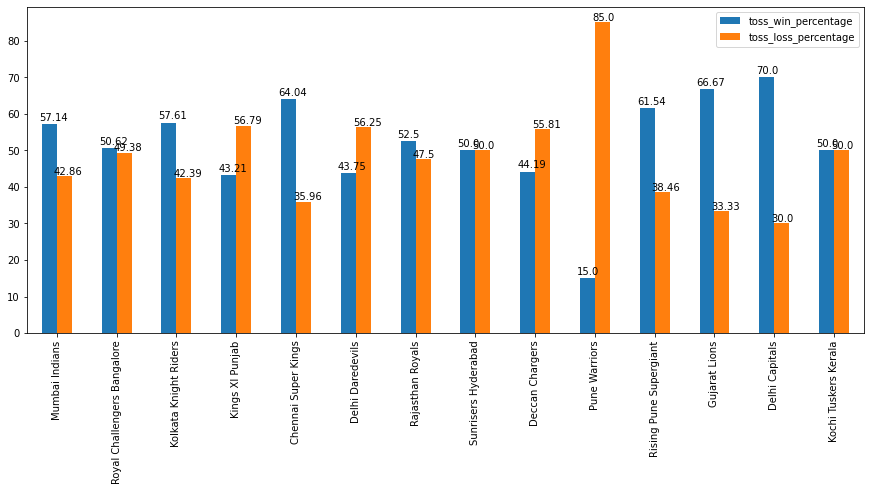

In [31]:
df = toss[['toss_win_percentage', 'toss_loss_percentage']]
tm = df.index
df.plot(kind = 'bar', figsize = (15,6))
for i in range(len(tm)):
    plt.text(x = i-0.3, y = df.loc[tm[i], 'toss_win_percentage']+1,
             s = round(df.loc[tm[i], 'toss_win_percentage'], 2))
    plt.text(x = i-0.05, y = df.loc[tm[i], 'toss_loss_percentage']+0.5,
             s = round(df.loc[tm[i], 'toss_loss_percentage'], 2))
plt.show()

In [32]:
match.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [33]:
toss['toss_loser'] = team['match_count'] - toss['toss_winner']
toss['ltoss_win'] = team['wins'] - toss['toss_win']
toss['ltoss_loss'] = team['loss'] - toss['toss_loss']
toss['ltoss_win_percentage'] = (toss['ltoss_win']/toss['toss_loser'])*100
toss['ltoss_loss_percentage'] = (toss['ltoss_loss']/toss['toss_loser'])*100
toss.head(2)

,toss_winner,toss_win,toss_loss,toss_win_percentage,toss_loss_percentage,toss_loser,ltoss_win,ltoss_loss,ltoss_win_percentage,ltoss_loss_percentage
Mumbai Indians,98,56,42,57.1429,42.8571,89,53,36,59.5506,40.4494
Royal Challengers Bangalore,81,41,40,50.6173,49.3827,99,43,56,43.4343,56.5657


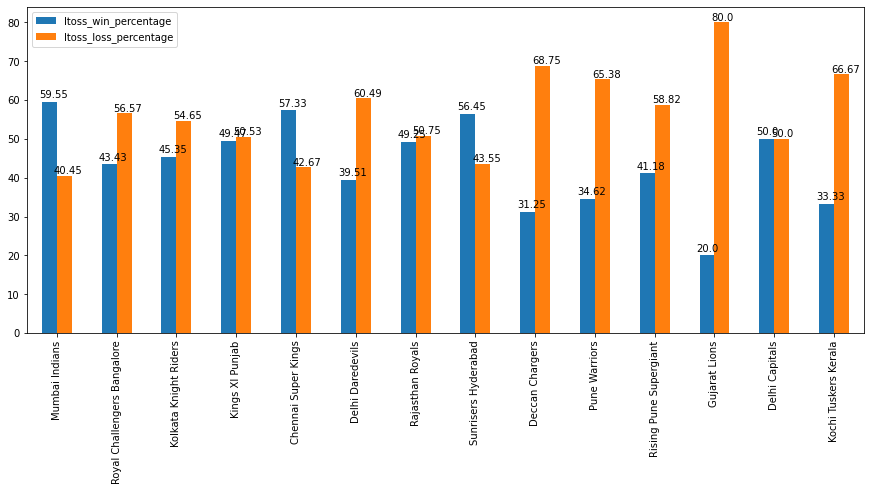

In [34]:
df = toss[['ltoss_win_percentage', 'ltoss_loss_percentage']]
tm = df.index
df.plot(kind = 'bar', figsize = (15,6))
for i in range(len(tm)):
    plt.text(x = i-0.3, y = df.loc[tm[i], 'ltoss_win_percentage']+1,
             s = round(df.loc[tm[i], 'ltoss_win_percentage'], 2))
    plt.text(x = i-0.05, y = df.loc[tm[i], 'ltoss_loss_percentage']+0.5,
             s = round(df.loc[tm[i], 'ltoss_loss_percentage'], 2))
plt.show()

In [35]:
toss['toss_winner_percentage'] = (toss['toss_winner']/team['match_count'])*100
toss['toss_loser_percentage'] = (toss['toss_loser']/team['match_count'])*100
toss.head(2)

,toss_winner,toss_win,toss_loss,toss_win_percentage,toss_loss_percentage,toss_loser,ltoss_win,ltoss_loss,ltoss_win_percentage,ltoss_loss_percentage,toss_winner_percentage,toss_loser_percentage
Mumbai Indians,98,56,42,57.1429,42.8571,89,53,36,59.5506,40.4494,52.4064,47.5936
Royal Challengers Bangalore,81,41,40,50.6173,49.3827,99,43,56,43.4343,56.5657,45,55


## ------------------------------------------------------------------------------------------------

In [36]:
dec_cnt = pd.DataFrame(match.groupby(['toss_winner'])['toss_decision'].value_counts())
dec_cnt.head()

toss_decision
toss_winner         toss_decision               
Chennai Super Kings bat                       48
                    field                     41
Deccan Chargers     bat                       24
                    field                     19
Delhi Capitals      field                      8

In [37]:
dec_cnt.columns = ['dec_count']

In [38]:
dec_cnt = dec_cnt.reset_index()
dec_cnt.head()

,toss_winner,toss_decision,dec_count
0,Chennai Super Kings,bat,48
1,Chennai Super Kings,field,41
2,Deccan Chargers,bat,24
3,Deccan Chargers,field,19
4,Delhi Capitals,field,8


In [39]:
toss_dec_bat = dec_cnt[dec_cnt['toss_decision'] == 'bat']
toss_dec_bat.set_index('toss_winner', inplace = True)
toss_dec_bat = toss_dec_bat.drop('toss_decision', axis = 1)
toss_dec_bat.columns = ['dec_bat']
toss_dec_field = dec_cnt[dec_cnt['toss_decision'] == 'field']
toss_dec_field.set_index('toss_winner', inplace = True)
toss_dec_field = toss_dec_field.drop('toss_decision', axis = 1)
toss_dec_field.columns = ['dec_field']
toss_dec_bat.head(2)

,dec_bat
toss_winner,
Chennai Super Kings,48
Deccan Chargers,24


In [40]:
win_dec = pd.DataFrame(match[(match['toss_winner'] == match['winner'])].groupby(
    'toss_winner')['toss_decision'].value_counts())
win_dec.head()

toss_decision
toss_winner         toss_decision               
Chennai Super Kings bat                       30
                    field                     27
Deccan Chargers     bat                       11
                    field                      8
Delhi Capitals      field                      6

In [41]:
win_dec.columns = ['win_dec_count']

In [42]:
win_dec = win_dec.reset_index()
win_dec.head()

,toss_winner,toss_decision,win_dec_count
0,Chennai Super Kings,bat,30
1,Chennai Super Kings,field,27
2,Deccan Chargers,bat,11
3,Deccan Chargers,field,8
4,Delhi Capitals,field,6


In [43]:
win_dec_bat = win_dec[win_dec['toss_decision'] == 'bat']
win_dec_bat.set_index('toss_winner', inplace = True)
win_dec_bat = win_dec_bat.drop('toss_decision', axis = 1)
win_dec_bat.columns = ['win_dec_bat']
win_dec_bat.fillna(0, inplace = True)
win_dec_field = win_dec[win_dec['toss_decision'] == 'field']
win_dec_field.set_index('toss_winner', inplace = True)
win_dec_field = win_dec_field.drop('toss_decision', axis = 1)
win_dec_field.columns = ['win_dec_field']
win_dec_field.fillna(0, inplace = True)
win_dec_field.head(2)

,win_dec_field
toss_winner,
Chennai Super Kings,27
Deccan Chargers,8


In [44]:
toss_dec = toss[['toss_winner']]
toss_dec.head()

,toss_winner
Mumbai Indians,98
Royal Challengers Bangalore,81
Kolkata Knight Riders,92
Kings XI Punjab,81
Chennai Super Kings,89


In [45]:
toss_dec = pd.concat([toss_dec, toss_dec_bat], axis = 1)
toss_dec = pd.concat([toss_dec, toss_dec_field], axis = 1)
toss_dec['dec_bat_percentage'] = (toss_dec['dec_bat']/toss_dec['toss_winner'])*100
toss_dec['dec_field_percentage'] = (toss_dec['dec_field']/toss_dec['toss_winner'])*100
toss_dec = pd.concat([toss_dec, win_dec_bat], axis = 1)
toss_dec = pd.concat([toss_dec, win_dec_field], axis = 1)
toss_dec['win_dec_bat'] = toss_dec['win_dec_bat'].fillna(0).astype('int')
toss_dec['win_dec_field'] = toss_dec['win_dec_field'].fillna(0).astype('int')
toss_dec['win_dec_bat_percentage'] = (toss_dec['win_dec_bat']/toss_dec['dec_bat'])*100
toss_dec['win_dec_field_percentage'] = (toss_dec['win_dec_field']/toss_dec['dec_field'])*100
toss_dec.head()

,toss_winner,dec_bat,dec_field,dec_bat_percentage,dec_field_percentage,win_dec_bat,win_dec_field,win_dec_bat_percentage,win_dec_field_percentage
Mumbai Indians,98,44,54,44.898,55.102,25,31,56.818182,57.407407
Royal Challengers Bangalore,81,20,61,24.6914,75.3086,9,32,45.000000,52.459016
Kolkata Knight Riders,92,30,62,32.6087,67.3913,15,38,50.000000,61.290323
Kings XI Punjab,81,26,55,32.0988,67.9012,6,29,23.076923,52.727273
Chennai Super Kings,89,48,41,53.9326,46.0674,30,27,62.500000,65.853659


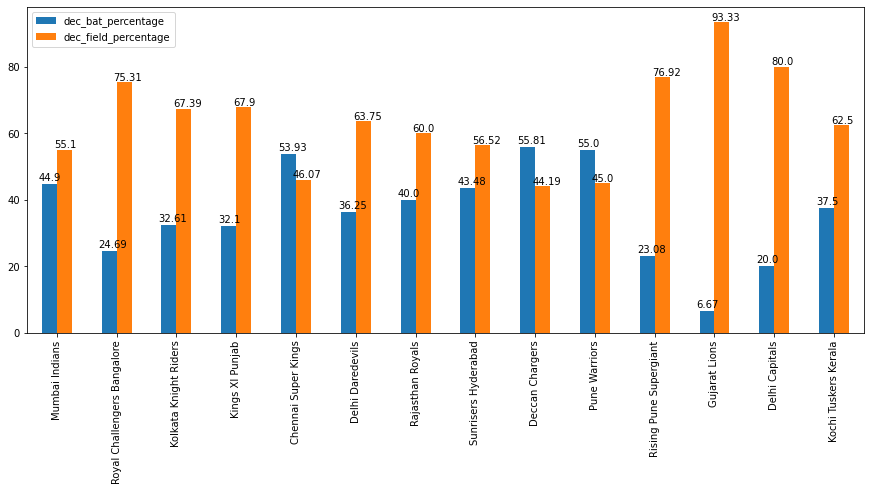

In [46]:
df = toss_dec[['dec_bat_percentage', 'dec_field_percentage']]
tm = df.index
df.plot(kind = 'bar', figsize = (15,6))
for i in range(len(tm)):
    plt.text(x = i-0.3, y = df.loc[tm[i], 'dec_bat_percentage']+1,
             s = round(df.loc[tm[i], 'dec_bat_percentage'], 2))
    plt.text(x = i-0.05, y = df.loc[tm[i], 'dec_field_percentage']+0.5,
             s = round(df.loc[tm[i], 'dec_field_percentage'], 2))
plt.show()

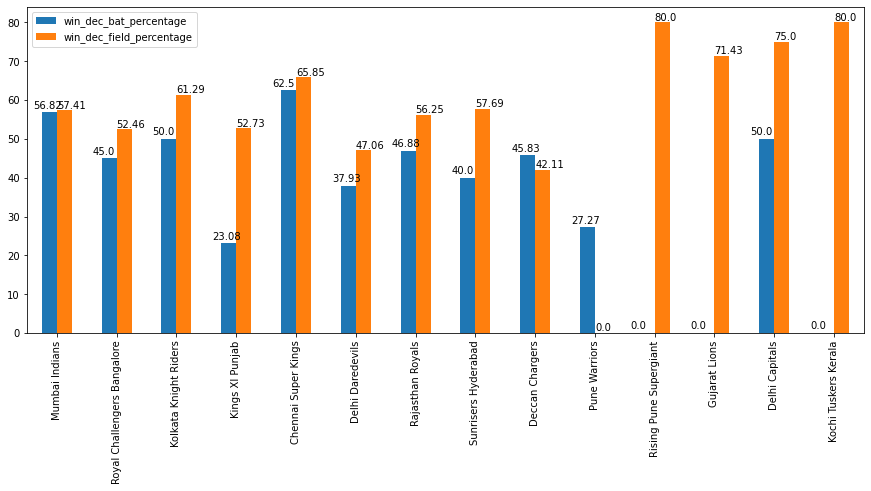

In [47]:
df = toss_dec[['win_dec_bat_percentage', 'win_dec_field_percentage']]
tm = df.index
df.plot(kind = 'bar', figsize = (15,6))
for i in range(len(tm)):
    plt.text(x = i-0.4, y = df.loc[tm[i], 'win_dec_bat_percentage']+1,
             s = round(df.loc[tm[i], 'win_dec_bat_percentage'], 2))
    plt.text(x = i, y = df.loc[tm[i], 'win_dec_field_percentage']+0.5,
             s = round(df.loc[tm[i], 'win_dec_field_percentage'], 2))
plt.show()

## --------------------------------------------------------------------------------------------------

In [48]:
pl_mat = pd.DataFrame(match['player_of_match'].value_counts())
pl_mat.head()

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
DA Warner,17
MS Dhoni,17


In [49]:
pl_mat.shape

(226, 1)

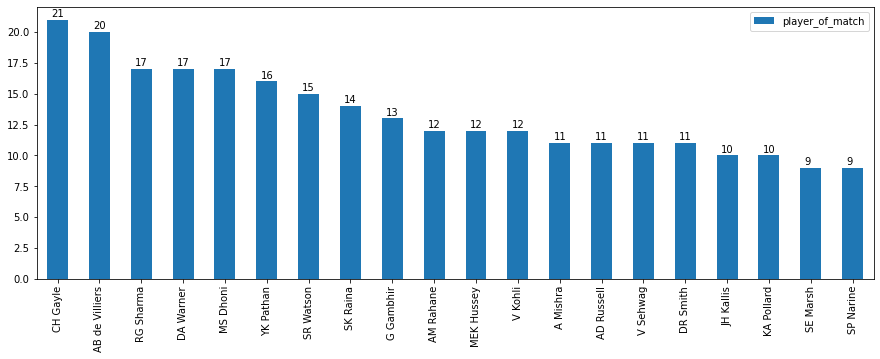

In [50]:
df = pl_mat.head(20)
pl = df.index
df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(pl)):
    plt.text(x = i-0.15, y = df.loc[pl[i], 'player_of_match'] + 0.25,
             s = df.loc[pl[i], 'player_of_match'])
plt.show()

## --------------------------------------------------------------------------------------------

In [51]:
deliv.drop(['batting_team', 'bowling_team'], axis = 1).head()

,match_id,inning,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [52]:
batsman = pd.DataFrame(deliv['batsman'].value_counts())
batsman.columns = ['deliveries']
batsman.head(2)

,deliveries
V Kohli,4211
SK Raina,4044


In [53]:
batsman.shape

(516, 1)

In [54]:
batsman['no_matches'] = pd.DataFrame(deliv.groupby('batsman')['match_id'].nunique())
batsman.head(2)

,deliveries,no_matches
V Kohli,4211,169
SK Raina,4044,189


In [55]:
dism = pd.DataFrame(deliv.groupby('batsman')['dismissal_kind'].value_counts())
dism.head()

dismissal_kind
batsman        dismissal_kind                
A Ashish Reddy caught                       8
               bowled                       5
               run out                      2
A Chandila     run out                      1
A Chopra       caught                       2

In [56]:
dism.columns = ['dism_count']
dism = dism.reset_index()
dism['dismissal_kind'].unique()

array(['caught', 'bowled', 'run out', 'lbw', 'stumped',
       'caught and bowled', 'obstructing the field', 'retired hurt',
       'hit wicket'], dtype=object)

In [57]:
dism_caught = dism[dism['dismissal_kind'] == 'caught'].set_index('batsman').drop('dismissal_kind', axis = 1)
dism_bowled = dism[dism['dismissal_kind'] == 'bowled'].set_index('batsman').drop('dismissal_kind', axis = 1)
dism_run_out = dism[dism['dismissal_kind'] == 'run out'].set_index('batsman').drop('dismissal_kind', axis = 1)
dism_lbw = dism[dism['dismissal_kind'] == 'lbw'].set_index('batsman').drop('dismissal_kind', axis = 1)
dism_stumped = dism[dism['dismissal_kind'] == 'stumped'].set_index('batsman').drop('dismissal_kind', axis = 1)
dism_caught_and_bowled = dism[dism['dismissal_kind'] == 'caught and bowled'].set_index('batsman').drop('dismissal_kind', axis = 1)
dism_obstructing_the_field = dism[dism['dismissal_kind'] == 'obstructing the field'].set_index('batsman').drop('dismissal_kind', axis = 1)
dism_retired_hurt = dism[dism['dismissal_kind'] == 'retired hurt'].set_index('batsman').drop('dismissal_kind', axis = 1)
dism_hit_wicket = dism[dism['dismissal_kind'] == 'hit wicket'].set_index('batsman').drop('dismissal_kind', axis = 1)

In [58]:
batsman['caught'] = dism_caught
batsman['bowled'] = dism_bowled
batsman['run_out'] = dism_run_out
batsman['lbw'] = dism_lbw
batsman['stumped'] = dism_stumped
batsman['caught_and_bowled'] = dism_caught_and_bowled
batsman['obstructing_the_field'] = dism_obstructing_the_field
batsman['retired_hurt'] = dism_retired_hurt
batsman['hit_wicket'] = dism_hit_wicket
batsman.head(2)

,deliveries,no_matches,caught,bowled,run_out,lbw,stumped,caught_and_bowled,obstructing_the_field,retired_hurt,hit_wicket
V Kohli,4211,169,95.0,30.0,15.0,7.0,3.0,2.0,NaN,NaN,NaN
SK Raina,4044,189,112.0,16.0,12.0,6.0,8.0,7.0,NaN,NaN,NaN


In [59]:
batsman = batsman.fillna(0).astype('int')
batsman.head(2)

,deliveries,no_matches,caught,bowled,run_out,lbw,stumped,caught_and_bowled,obstructing_the_field,retired_hurt,hit_wicket
V Kohli,4211,169,95,30,15,7,3,2,0,0,0
SK Raina,4044,189,112,16,12,6,8,7,0,0,0


In [60]:
batsman['out'] = batsman[batsman.drop(['deliveries', 'no_matches'], axis = 1).columns].sum(axis = 1)
batsman['not_out'] = batsman['no_matches'] - batsman['out']
batsman.head(2)

,deliveries,no_matches,caught,bowled,run_out,lbw,stumped,caught_and_bowled,obstructing_the_field,retired_hurt,hit_wicket,out,not_out
V Kohli,4211,169,95,30,15,7,3,2,0,0,0,152,17
SK Raina,4044,189,112,16,12,6,8,7,0,0,0,161,28


In [61]:
batsman['total_runs'] = pd.DataFrame(deliv.groupby('batsman')['batsman_runs'].sum())
batsman['avg_runs_match'] = round(batsman['total_runs']/batsman['no_matches'], 2)
batsman['avg_runs'] = round(batsman['total_runs']/batsman['out'], 2)
batsman['strike_rate'] = round((batsman['total_runs']/batsman['deliveries'])*100, 2)
batsman.head(2)

,deliveries,no_matches,caught,bowled,run_out,lbw,stumped,caught_and_bowled,obstructing_the_field,retired_hurt,hit_wicket,out,not_out,total_runs,avg_runs_match,avg_runs,strike_rate
V Kohli,4211,169,95,30,15,7,3,2,0,0,0,152,17,5434,32.15,35.75,129.04
SK Raina,4044,189,112,16,12,6,8,7,0,0,0,161,28,5415,28.65,33.63,133.90


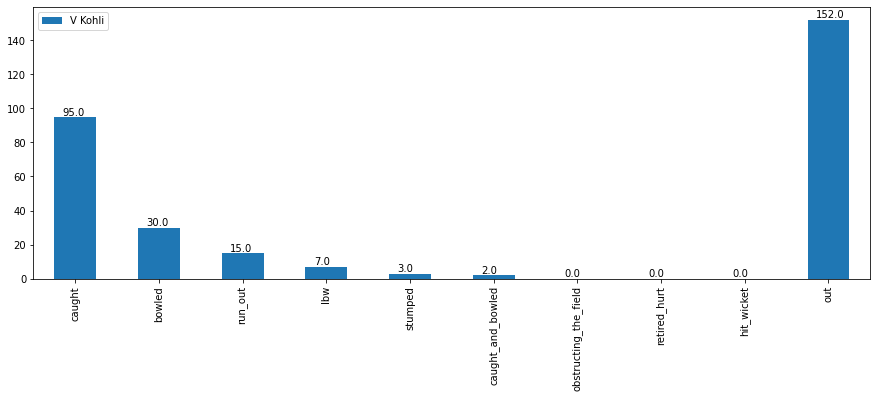

In [62]:
vk = pd.DataFrame(batsman.loc['V Kohli', batsman.columns[2:-5]])
ind = vk.index
vk.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.15, y = vk.loc[ind[i], 'V Kohli'] + 1, s = vk.loc[ind[i], 'V Kohli'])
plt.show()

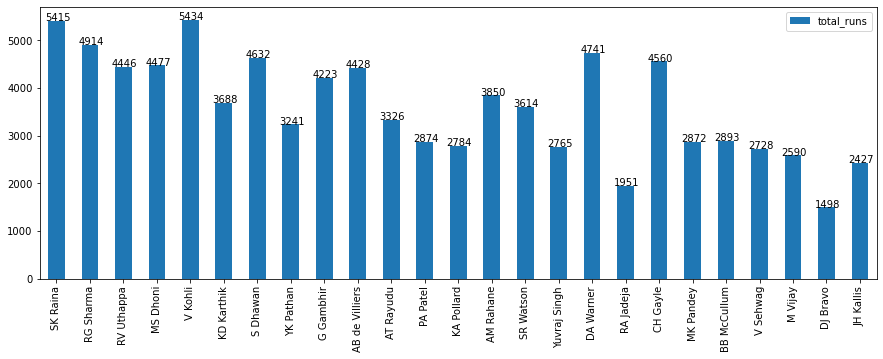

In [63]:
df = batsman.sort_values(by = 'no_matches', ascending = False).head(25)[['total_runs']]
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.35, y = df.loc[ind[i], 'total_runs']+2, s = df.loc[ind[i], 'total_runs'])
    
plt.show()

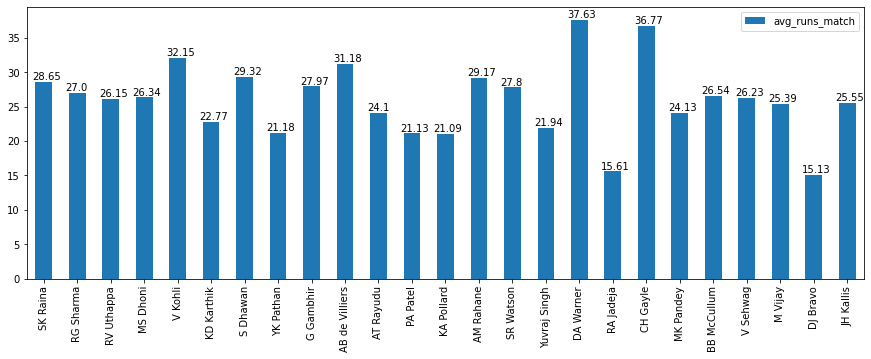

In [64]:
df = batsman.sort_values(by = 'no_matches', ascending = False).head(25)[['avg_runs_match']]
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.35, y = df.loc[ind[i], 'avg_runs_match']+0.3,
             s = df.loc[ind[i], 'avg_runs_match'])
    
plt.show()

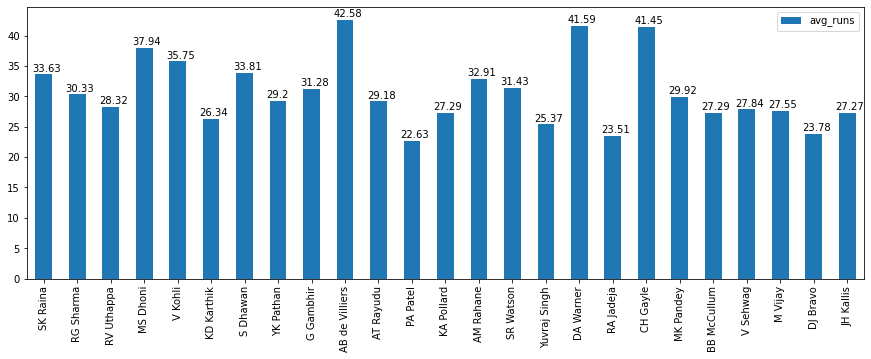

In [65]:
df = batsman.sort_values(by = 'no_matches', ascending = False).head(25)[['avg_runs']]
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.35, y = df.loc[ind[i], 'avg_runs']+0.5, s = df.loc[ind[i], 'avg_runs'])
    
plt.show()

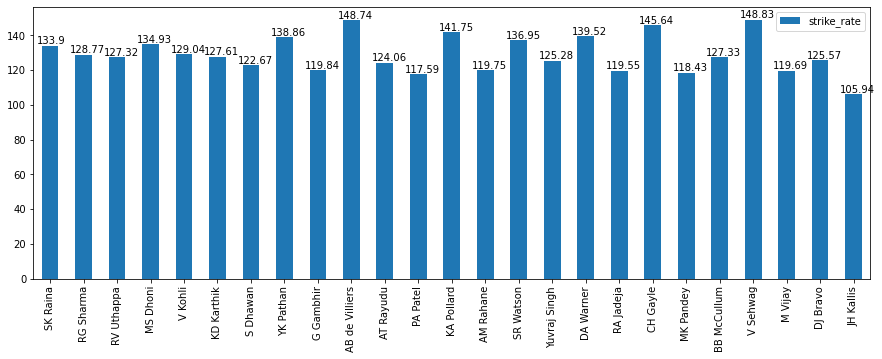

In [66]:
df = batsman.sort_values(by = 'no_matches', ascending = False).head(25)[['strike_rate']]
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.4, y = df.loc[ind[i], 'strike_rate']+1, s = df.loc[ind[i], 'strike_rate'])
    
plt.show()

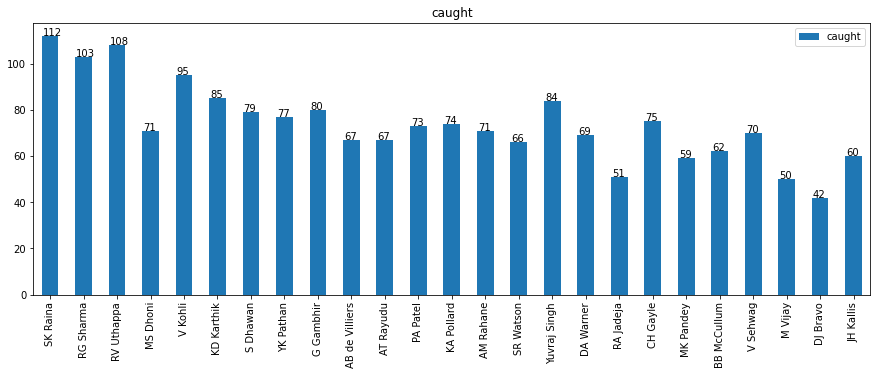

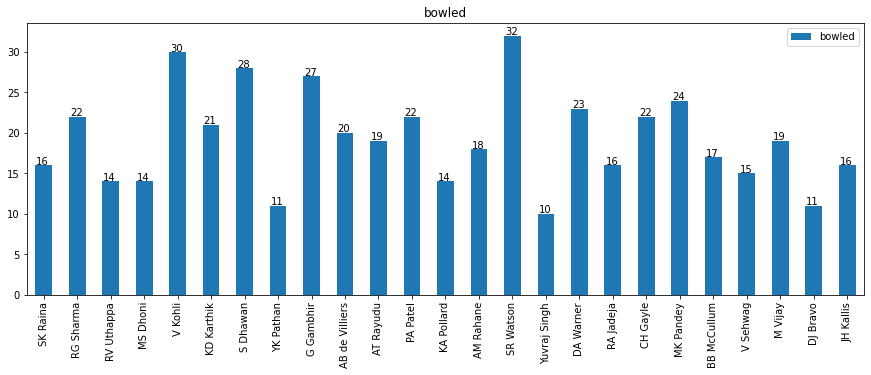

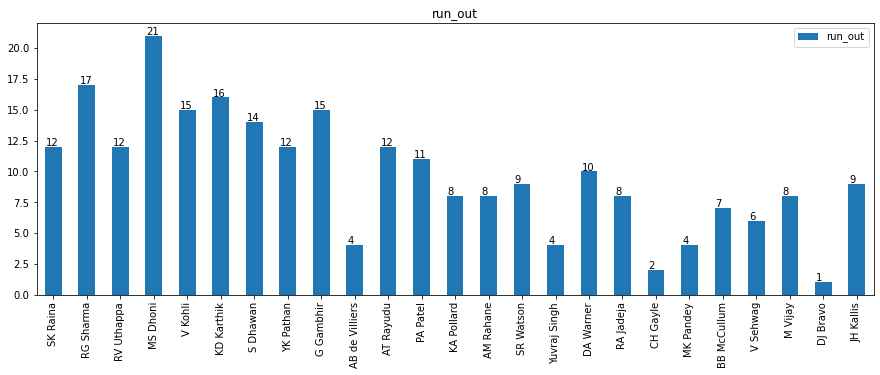

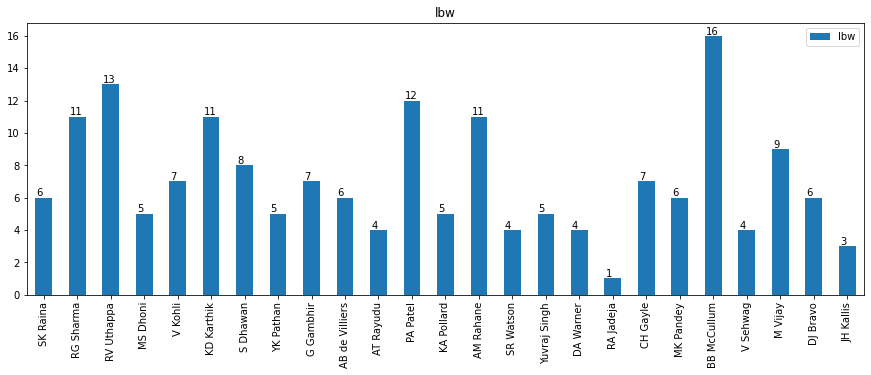

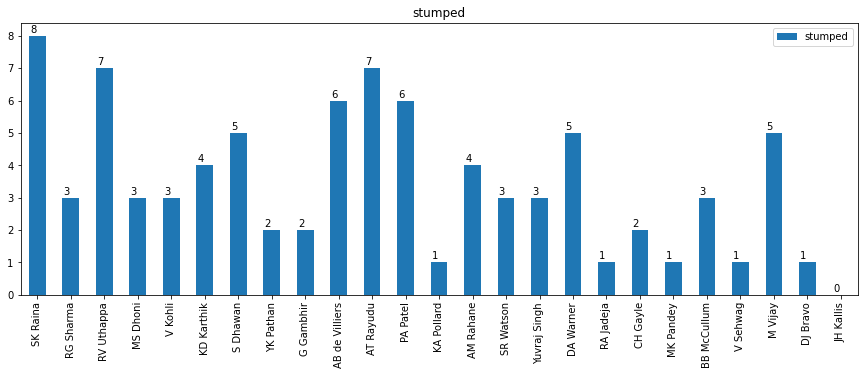

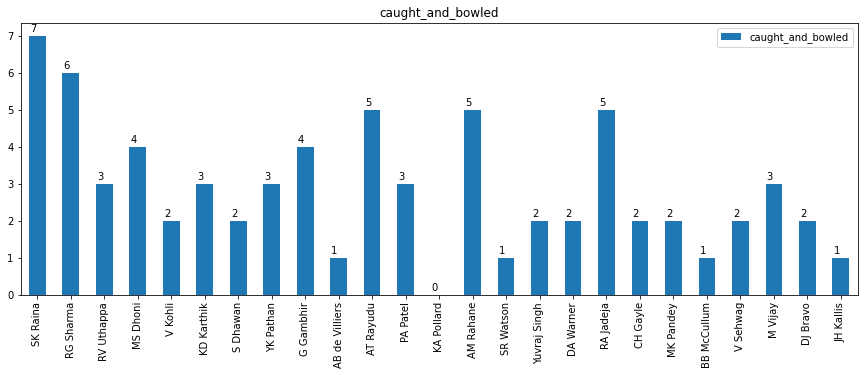

In [67]:
for i in batsman.columns[2:-9]:
    df = batsman.sort_values(by = 'no_matches', ascending = False).head(25)[[i]]
    ind = df.index
    df.plot(kind = 'bar', figsize = (15,5))
    for j in range(len(ind)):
        plt.text(x = j-0.22, y = df.loc[ind[j], i] + 0.1, s = df.loc[ind[j], i])
    plt.title(i)
    plt.show()

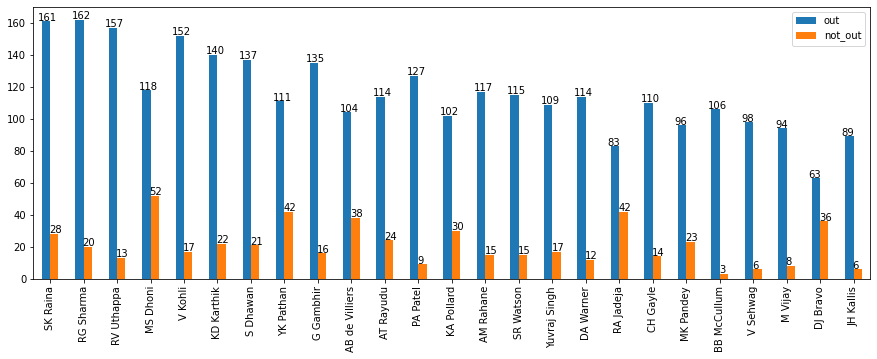

In [68]:
df = batsman.sort_values(by = 'no_matches', ascending = False).head(25)[['out', 'not_out']]
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.35, y = df.loc[ind[i], 'out']+0.5, s = df.loc[ind[i], 'out'])
    plt.text(x = i-0.025, y = df.loc[ind[i], 'not_out']+0.5, s = df.loc[ind[i], 'not_out'])

plt.show()

## --------------------------------------------------------------------------------------------

In [69]:
non_str = pd.DataFrame(deliv[deliv['dismissal_kind'] == 'run out']['non_striker'].value_counts())
non_str.head()

,non_striker
KD Karthik,16
SK Raina,16
RG Sharma,15
YK Pathan,14
AB de Villiers,14


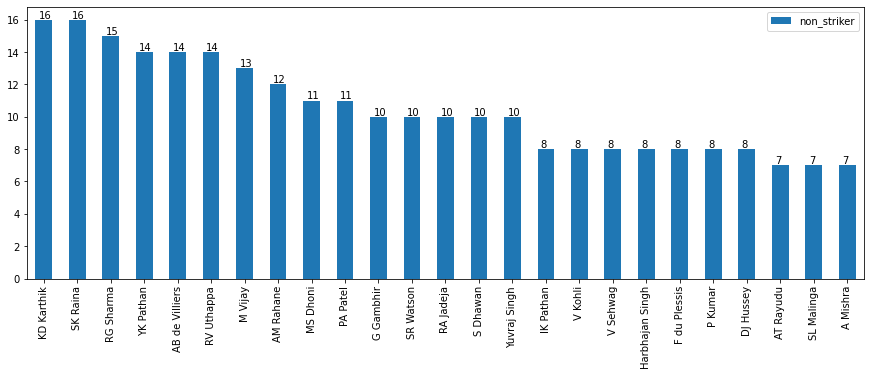

In [70]:
df = non_str.head(25)
df.plot(kind = 'bar', figsize = (15,5))
for i in range(25):
    plt.text(x = i-0.15, y = df.iloc[i, 0]+0.1, s = df.iloc[i, 0])
    
plt.show()

## --------------------------------------------------------------------------------------------

In [71]:
fielder = pd.DataFrame(deliv['fielder'].value_counts())
fielder.head()

,fielder
MS Dhoni,159
KD Karthik,152
RV Uthappa,125
SK Raina,115
AB de Villiers,114


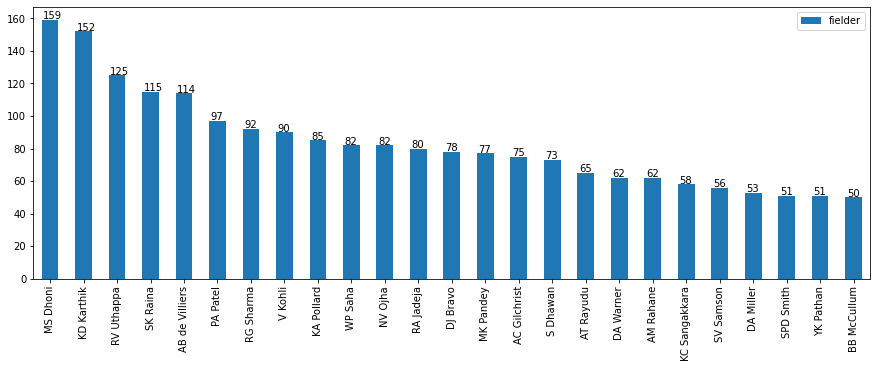

In [72]:
df = fielder.head(25)
df.plot(kind = 'bar', figsize = (15,5))
for i in range(25):
    plt.text(x = i-0.2, y = df.iloc[i, 0]+0.5, s = df.iloc[i, 0])
    
plt.show()

In [73]:
fielder['avg_dismissal'] = pd.DataFrame(fielder['fielder']/batsman['no_matches'])
fielder.head()

,fielder,avg_dismissal
MS Dhoni,159,0.935294
KD Karthik,152,0.938272
RV Uthappa,125,0.735294
SK Raina,115,0.608466
AB de Villiers,114,0.802817


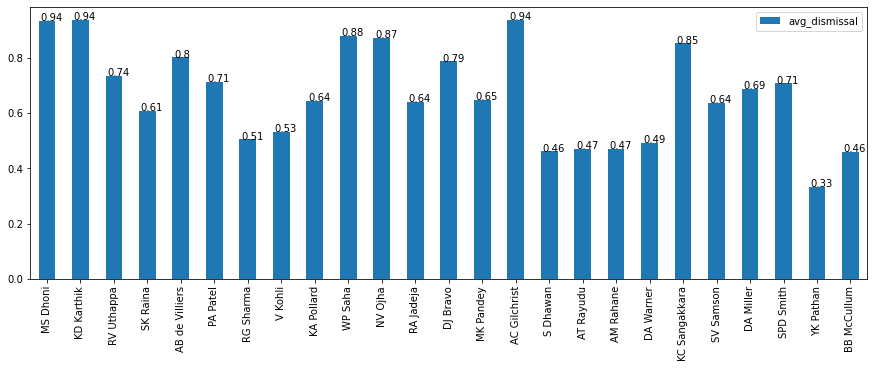

In [74]:
df = fielder.sort_values(by = 'fielder', ascending = False).head(25)[['avg_dismissal']]
df.plot(kind = 'bar', figsize = (15,5))
for i in range(25):
    plt.text(x = i-0.2, y = df.iloc[i, 0], s = round(df.iloc[i, 0],2))
    
plt.show()

## --------------------------------------------------------------------------------------------

In [75]:
bowler = pd.DataFrame(deliv['bowler'].value_counts())
bowler.columns = ['deliveries']
bowler.head(2)

,deliveries
Harbhajan Singh,3451
A Mishra,3172


In [76]:
bowler.shape

(405, 1)

In [77]:
bowler['no_matches'] = pd.DataFrame(deliv.groupby('bowler')['match_id'].nunique())
bowler.head(2)

,deliveries,no_matches
Harbhajan Singh,3451,157
A Mishra,3172,147


In [78]:
bowler['wide_runs'] = deliv.groupby('bowler')['wide_runs'].sum()
bowler['noball_runs'] = deliv.groupby('bowler')['noball_runs'].sum()
bowler.head(2)

,deliveries,no_matches,wide_runs,noball_runs
Harbhajan Singh,3451,157,96,3
A Mishra,3172,147,57,20


In [79]:
deliv['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [80]:
bowler['dismissals'] = deliv[(deliv['dismissal_kind'] == 'caught') |
                             (deliv['dismissal_kind'] == 'bowled') |
                             (deliv['dismissal_kind'] == 'lbw') |
                             (deliv['dismissal_kind'] == 'caught and bowled') |
     (deliv['dismissal_kind'] == 'stumped') |
      (deliv['dismissal_kind'] == 'hit wicket')]['bowler'].value_counts()
bowler.head(2)

,deliveries,no_matches,wide_runs,noball_runs,dismissals
Harbhajan Singh,3451,157,96,3,150.0
A Mishra,3172,147,57,20,156.0


In [81]:
bowler['batsman_runs'] = deliv.groupby('bowler')['batsman_runs'].sum()
bowler['total_runs'] = bowler[['wide_runs', 'noball_runs', 'batsman_runs']].sum(axis = 1)
bowler = bowler.fillna(0).astype('int')
bowler.head(2)

,deliveries,no_matches,wide_runs,noball_runs,dismissals,batsman_runs,total_runs
Harbhajan Singh,3451,157,96,3,150,3880,3979
A Mishra,3172,147,57,20,156,3727,3804


In [82]:
bowler['economy'] = round((bowler['total_runs']/bowler['deliveries'])*6, 2)
bowler['strike_rate'] = round((bowler['deliveries']/bowler['dismissals']), 2)
bowler['strike_rate'] = bowler['strike_rate'].replace({np.inf : 0})
bowler.head(2)

,deliveries,no_matches,wide_runs,noball_runs,dismissals,batsman_runs,total_runs,economy,strike_rate
Harbhajan Singh,3451,157,96,3,150,3880,3979,6.92,23.01
A Mishra,3172,147,57,20,156,3727,3804,7.20,20.33


In [83]:
bowler['extras'] = bowler['wide_runs'] + bowler['noball_runs']
bowler.head(2)

,deliveries,no_matches,wide_runs,noball_runs,dismissals,batsman_runs,total_runs,economy,strike_rate,extras
Harbhajan Singh,3451,157,96,3,150,3880,3979,6.92,23.01,99
A Mishra,3172,147,57,20,156,3727,3804,7.20,20.33,77


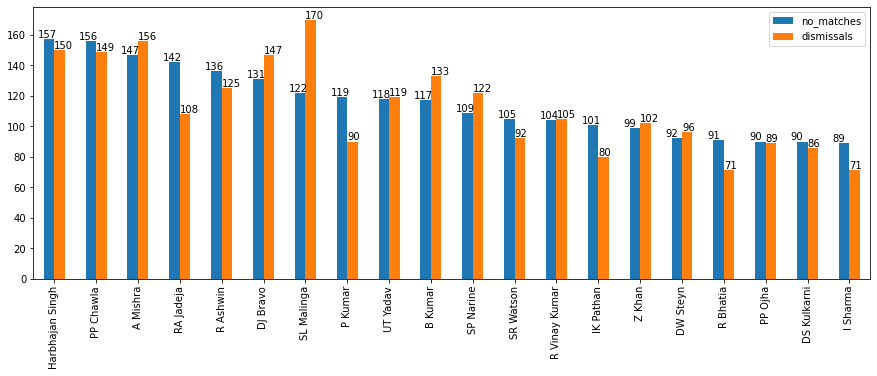

In [84]:
df = bowler.sort_values(by = 'no_matches', ascending = False)[['no_matches', 'dismissals']].head(20)
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.4, y = df.iloc[i, 0] + 1, s = df.iloc[i, 0])
    plt.text(x = i, y = df.iloc[i, 1] + 1, s = df.iloc[i, 1])
    
plt.show()

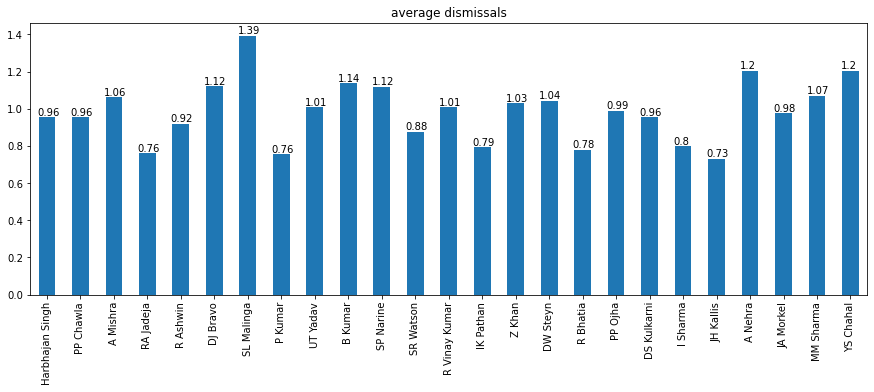

In [85]:
df = bowler[['no_matches']]
df['avg_dism'] = bowler.loc[:,'dismissals']/bowler.loc[:,'no_matches']
df = df.sort_values(by = 'no_matches', ascending = False).head(25)
ind = df.index

df['avg_dism'].plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.3, y = df.iloc[i, 1] + 0.01, s = round(df.iloc[i, 1],2))

plt.title('average dismissals')
plt.show()

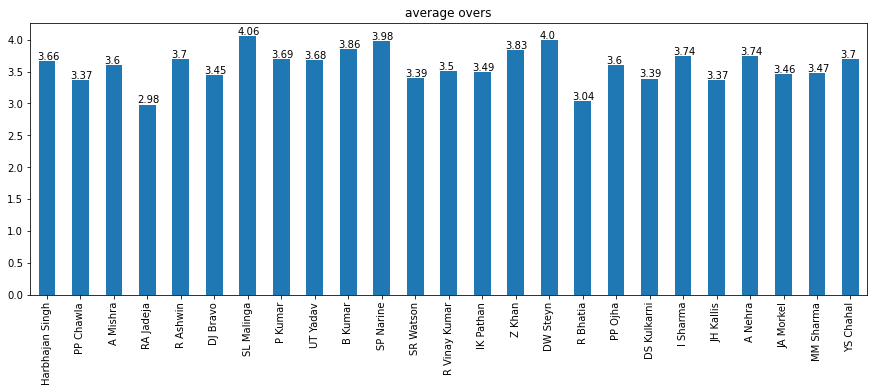

In [86]:
df = bowler[['no_matches']]
df['avg_deliv'] = (bowler.loc[:,'deliveries']/bowler.loc[:,'no_matches'])/6
df = df.sort_values(by = 'no_matches', ascending = False).head(25)
ind = df.index

df['avg_deliv'].plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.3, y = df.iloc[i, 1] + 0.025, s = round(df.iloc[i, 1],2))

plt.title('average overs')
plt.show()

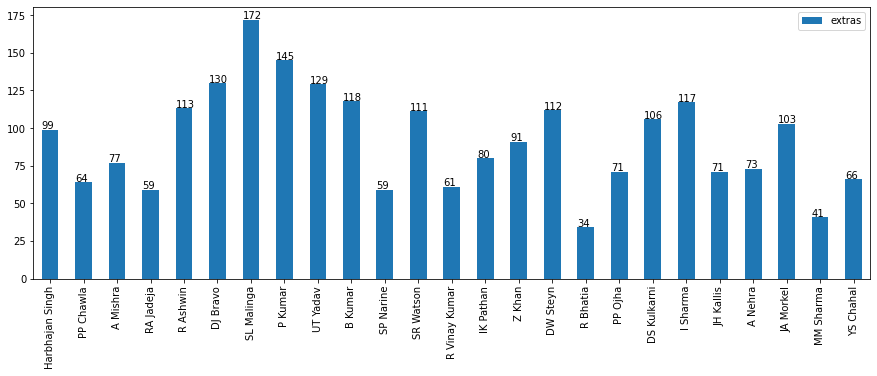

In [87]:
df = bowler.sort_values(by = 'no_matches', ascending = False)[['extras']].head(25)
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.25, y = df.iloc[i, 0] + 0.5, s = df.iloc[i, 0])
    
plt.show()

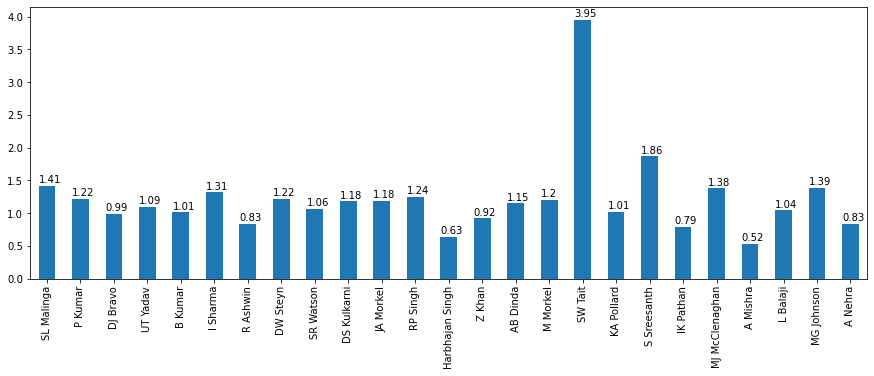

In [88]:
df = bowler[['no_matches', 'extras']]
df['avg_extras'] = df['extras']/df['no_matches']
df = df.sort_values(by = 'extras', ascending = False).head(25)
ind = df.index

df['avg_extras'].plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.25, y = df.iloc[i, 2] + 0.05, s = round(df.iloc[i, 2],2))
    
plt.show()

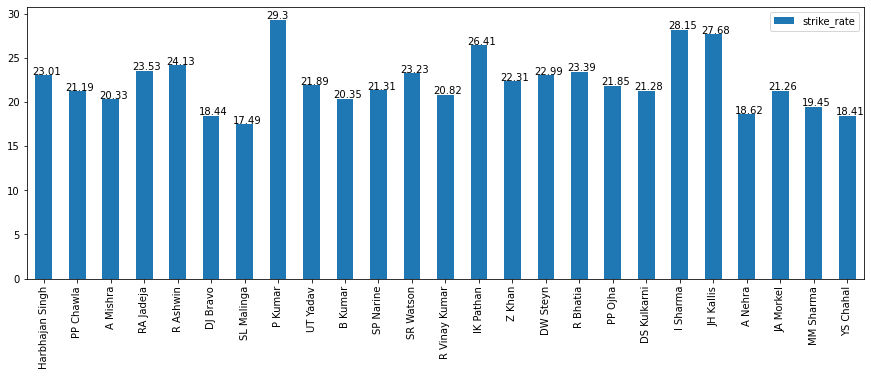

In [89]:
df = bowler.sort_values(by = 'no_matches', ascending = False)[['strike_rate']].head(25)
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.35, y = df.iloc[i, 0] + 0.1, s = df.iloc[i, 0])
    
plt.show()

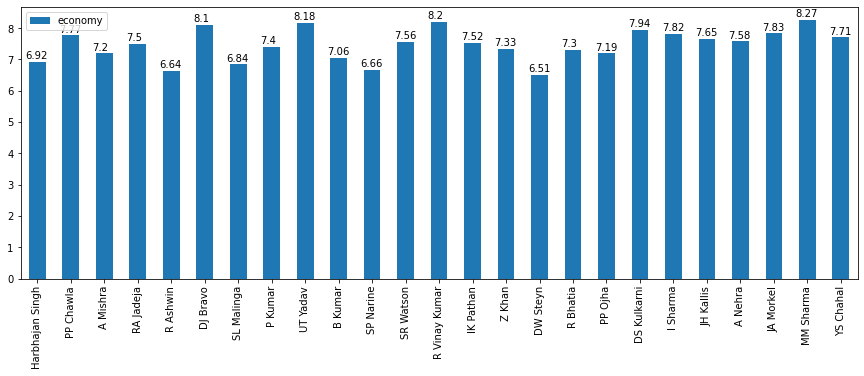

In [90]:
df = bowler.sort_values(by = 'no_matches', ascending = False)[['economy']].head(25)
ind = df.index

df.plot(kind = 'bar', figsize = (15,5))
for i in range(len(ind)):
    plt.text(x = i-0.35, y = df.iloc[i, 0] + 0.1, s = df.iloc[i, 0])
    
plt.show()